In [1]:
import os
import torch
import matplotlib.pyplot as plt
from mnistgm.experiment import MNISTGM

In [2]:
EXP_DIR = 'runs/MNIST_GM/joint_elbo/non_factorized/laplace_normal/GM_MNIST_2022_01_16_10_32_56_889215/'

In [3]:
flags = torch.load(os.path.join(EXP_DIR, 'flags.rar'))

In [4]:
exp = MNISTGM(flags, [])

/home/ziyigong/.local/lib/python3.8/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(


dict_keys(['real', 'random', '', 'mnist', 'gm', 'gm_mnist'])


In [5]:
vae = exp.mm_vae

In [6]:
vae.load_state_dict(torch.load(os.path.join(EXP_DIR, 'checkpoints/0019/mm_vae')))

<All keys matched successfully>

In [7]:
dataset = exp.dataset_test
test_loader = torch.utils.data.DataLoader(dataset, batch_size=200, shuffle=True)

In [8]:
for (data, label) in test_loader:
    for key in data.keys():
        data[key] = data[key].to(flags.device)
    results = vae(data)
    break

In [9]:
rec_mnist = results['rec']['mnist'].mean
rec_gm = results['rec']['gm'].mean

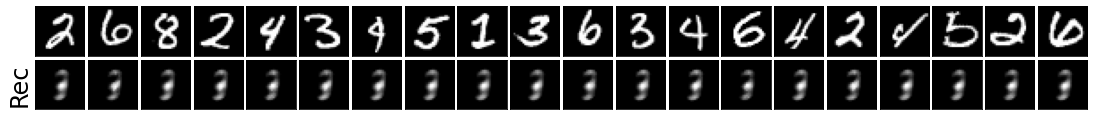

In [10]:
ncols = min(rec_mnist.shape[0], 20)
fig, ax = plt.subplots(nrows=2, ncols=ncols, figsize=(15, 1.5))
for i, aux in enumerate(zip(data['mnist'], rec_mnist)):
    if i >= ncols:
        break
    for j, im in enumerate(aux):
        ax[j, i].imshow(im.detach().cpu().numpy().reshape(28, 28), cmap='gray')
        ax[j, i].set_xticks([])
        ax[j, i].set_yticks([])
ax[1, 0].set_ylabel('Rec', fontsize=24)
fig.tight_layout(pad=0)

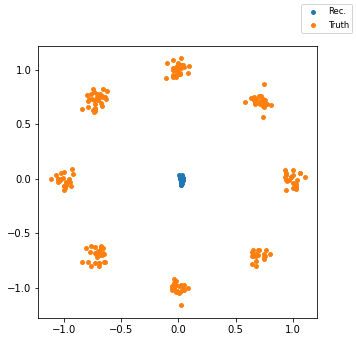

In [11]:
fig, ax = plt.subplots(1, figsize=(5, 5))
ax.scatter(*rec_gm.detach().cpu().numpy().T, label='Rec.', s=15, zorder=2)
ax.scatter(*data['gm'].detach().cpu().numpy().T, label='Truth', s=15, zorder=3)
fig.legend(fontsize='small')